<a href="https://colab.research.google.com/github/inhoblock/Data_science-Study/blob/main/Chapter08_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter8_2

합성곱 신경망을 사용한 이미지 분류

# 패션 MNIST 데이터 불러오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


# 합성곱 신경망 만들기

In [11]:
model = keras.Sequential()

In [12]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [13]:
model.add(keras.layers.MaxPooling2D(2))

In [14]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [15]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               156900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

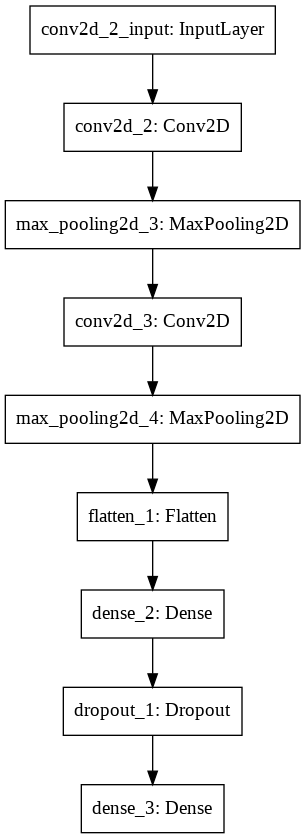

In [17]:
keras.utils.plot_model(model)

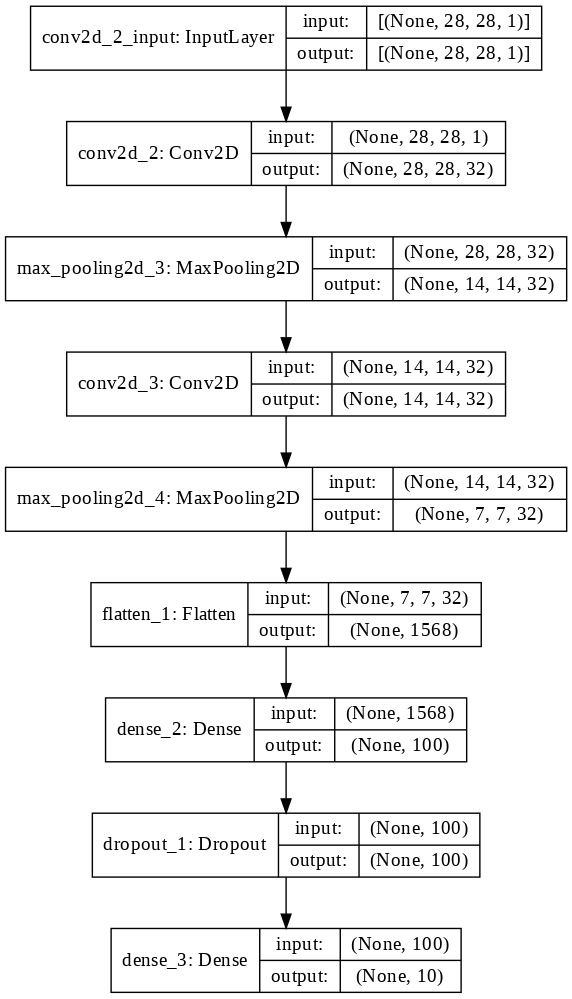

In [19]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=100)

# 모델 컴파일과 훈련

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 50s 33ms/step - loss: 0.7703 - accuracy: 0.7177 - val_loss: 0.3737 - val_accuracy: 0.8597
Epoch 2/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3845 - accuracy: 0.8593 - val_loss: 0.3088 - val_accuracy: 0.8848
Epoch 3/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3299 - accuracy: 0.8813 - val_loss: 0.2806 - val_accuracy: 0.8978
Epoch 4/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2870 - accuracy: 0.8958 - val_loss: 0.2626 - val_accuracy: 0.9016
Epoch 5/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2594 - accuracy: 0.9068 - val_loss: 0.2436 - val_accuracy: 0.9100
Epoch 6/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2440 - accuracy: 0.9116 - val_loss: 0.2532 - val_accuracy: 0.9087
Epoch 7/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2218 - accuracy: 0.9173 - val_loss: 0.2362 -

In [22]:
import matplotlib.pyplot as plt

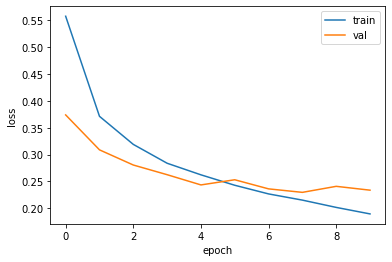

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [24]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 9ms/step - loss: 0.2297 - accuracy: 0.9159


[0.22973431646823883, 0.9159166812896729]

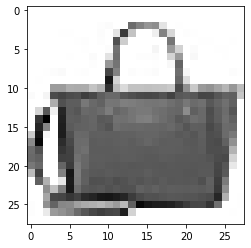

In [25]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [26]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[2.5703507e-15 8.9542396e-23 2.6377628e-18 9.7476128e-17 4.7532042e-15
  4.4273793e-16 4.3775229e-14 2.8658979e-18 1.0000000e+00 6.4328844e-16]]


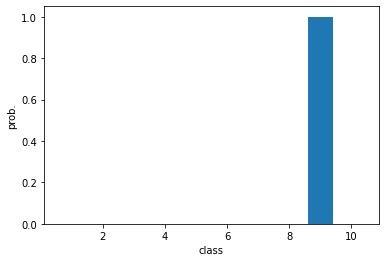

In [27]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [28]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [29]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [30]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 266.0

In [31]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 10ms/step - loss: 0.2528 - accuracy: 0.9107


[0.25280019640922546, 0.9107000231742859]